In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [2]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):
    '''Prints the AUC scores for training and testing data
    and returns testing score'''

    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    print('Training AUC:' , roc_auc_score(y_train, y_train_score))
    print('Testing AUC: ', roc_auc_score(y_test, y_test_score))
 
    return y_test_score

def plot_roc_curve(y_test, y_test_score):
    '''Plot ROC curve for testing data'''
    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'k — ')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()

#https://medium.com/swlh/how-to-code-and-evaluate-of-decision-trees-2d94093b3c1a

In [3]:
path = pd.read_csv("../Data/cleansed_final.csv")

In [4]:
final = path[["MSI","Under50","TILS", "Stage12", "Signet", "RightSide","NoNecrosis", "Mucin", "ModDiff", "HistHet", "Female", "Expansile", "CrohnMissing", "Crohn", "AngioLymph"]]

In [5]:
final

,MSI,Under50,TILS,Stage12,Signet,RightSide,NoNecrosis,Mucin,ModDiff,HistHet,Female,Expansile,CrohnMissing,Crohn,AngioLymph
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0
4,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0
1906,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0
1907,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1908,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X = final.drop("MSI", axis=1)

In [7]:
y = final["MSI"]

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=.3, random_state=1)
## train test val
## 81 : 9 : 10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=1)

In [10]:
## use smote to deal with imbalanced data by oversampling
oversample = SMOTE(random_state = 1)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

## RBF SVM 

In [11]:
## SVM rbf
clf = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=258, shrinking=True, tol=0.001,
    verbose=False)
clf = clf.fit(X_smote, y_smote)

Training AUC: 0.7779247406237869
Testing AUC:  0.7571138211382114


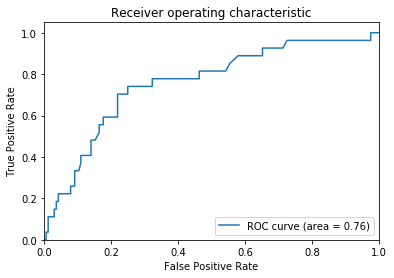

In [13]:
## AUC ROC curve
y_test_score = get_auc_scores(clf, X_smote, X_test, y_smote, y_test)

plot_roc_curve(y_test, y_test_score)

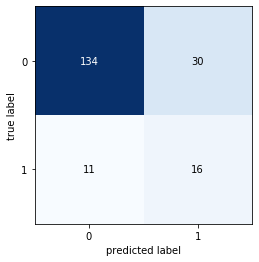

In [14]:
## confusion matrix
fig, ax = plot_confusion_matrix(confusion_matrix(np.array(y_test), 
                       clf.predict(X_test).tolist()))
plt.show()

## Linear SVM

In [15]:
ln_svm = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=258, shrinking=True, tol=0.001,
    verbose=False)
ln_svm = ln_svm.fit(X_smote, y_smote)

Training AUC: 0.7035130593166485
Testing AUC:  0.7720189701897019


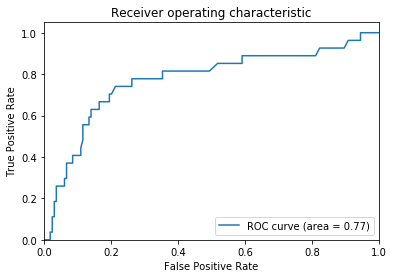

In [16]:
## AUC ROC curve
y_test_score_ln = get_auc_scores(ln_svm, X_smote, X_test, y_smote, y_test)

plot_roc_curve(y_test, y_test_score_ln)

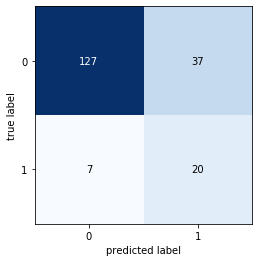

In [17]:
## confusion matrix
fig, ax = plot_confusion_matrix(confusion_matrix(np.array(y_test), 
                       ln_svm.predict(X_test).tolist()))
plt.show()

In [16]:
ln_svm.coef_

array([[-1.18691169e-04,  1.99945752e+00,  9.47825189e-05,
        -3.69985487e-04,  3.19826642e-04,  3.31875108e-04,
         5.78430273e-05,  1.85718721e-04, -2.95978240e-05,
         7.69788462e-06,  4.53893568e-05, -1.32273898e-05,
        -4.31717194e-05, -1.02067066e-04]])

In [17]:
feature_importance = pd.DataFrame()
feature_importance["value"] = ln_svm.coef_[0]
feature_importance["feature"] = X_smote.columns.tolist()
feature_importance.sort_values(by = 'value', ascending=False, inplace=True)

In [18]:
feature_importance # cannot drop Crohn missing and Crohn; corr matrix to see if covariant

,value,feature
1,1.999458,TILS
5,0.000332,NoNecrosis
4,0.000320,RightSide
7,0.000186,ModDiff
2,0.000095,Stage12
6,0.000058,Mucin
10,0.000045,Expansile
9,0.000008,Female
11,-0.000013,CrohnMissing
8,-0.000030,HistHet


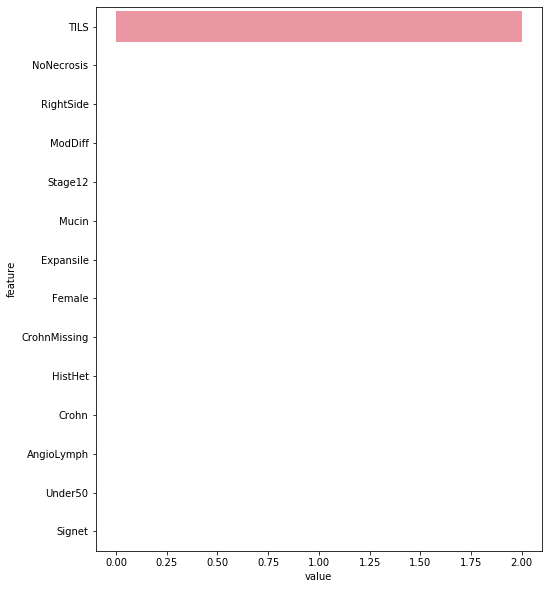

In [19]:
plt.figure(figsize=(8,10))
ax = sns.barplot(y="feature", x="value", data=feature_importance)